# Lecture 3: Turning Flight  


## Roadmap of this lecture
Welcome back to another lecture! As before, a roadmap of the lecture is presented. Should you feel a little lost or in need of some context, this roadmap serves to provide you glimpse of the larger picture. If there are any sections you would like to jump to or revisit, feel free to directly skip ahead. 

Firstly, the [Lecture objectives](#lec-obj) are stated. These should help you understand what to expect and more importantly inform you of what you are expected to be able to do. It is wise to revisit these objectives once you have understood the content. Thereafter, the framework for turning performance is described in [Turning Performance](#terning-perf). Further, several types of turns are investigated in [Types of Turns](#types-of-turns). Using the results from these analyses, some generalised remarks are made under [Some Generalised Remarks](#some-generalised-remarks). Hereafter, the effects of altitude are considered in [Altitude Effects](#altitude-effects). Lastly, the main [Conclusions](#conclusion) are summarised, and short of preview of the next lecture is given in the section [What next?](#what-next). 


<a id="lec-obj"></a>
## Lecture Objectives 

By the end of mastering this lecture, for flight in a steady horizontal coordinated turn, you should be able to:
> *describe* operational and optimal flying strategies <br>
> *Formulate* point-mass equations of motion <br>
> *Derive* expression for performance metrics <br>
> *Calculate* the most relevant performance metrics <br>
> *Explain* the effects of flight and aircraft parameters on performance metrics <br>

As usual, make sure to practice sufficiently until you feel comfortable with these objectives!

<a id="turning-perf"></a>
## Turning Performance 
Similar to before, to analyse turning performance let us begin by considering the relevant governing equations and assumptions. Here, the analysis of turning performance will be constrained by the following assumptions:
1. The aircraft is under steady conditions, hence $\frac{\partial V}{\partial t} = 0$ and $\frac{\partial \gamma}{\partial t} =0$ 
2. The trajectory is coordinated, hence the slideslip angle is zero 
3. The trajectory is horizontal, hence $\gamma = 0$ and $dh = 0$ 

![alt text](Images\lec3-fbd.png)

Based on these assumptions and kinematics, the general equations of motion resolve into: 

$$ T-D=0 \\ L \sin \mu - \frac{WV^2}{gR} = 0 \\ -L\cos \mu + W = 0$$ 

The last equation here brings forth an important notion: the load factor. The load factor refers to how much greater lift is than weight. This makes sense because only the vertical component of lift balances the weight and hence the following inequality must hold:
$$L_{\text{turn}} > L_{\text{symmetric}} $$
Hence, the load factor is defined as follows:
$$ n = \frac{L}{W} = \frac{1}{\cos \mu} $$

The following plot visualises how the load factor changes based on the bank angle, $\mu$

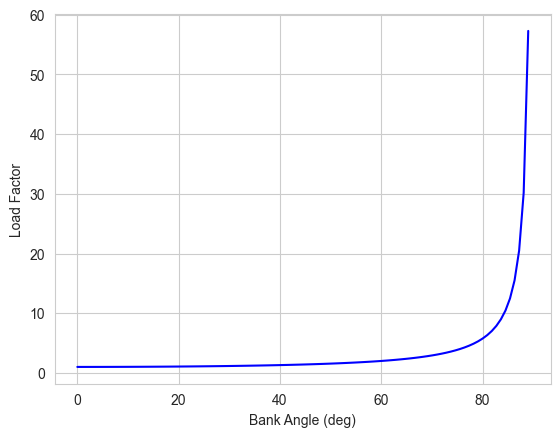

In [1]:
from ipywidgets import *  # interactive display
# import function_file  # functions for this lecture

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
# from data_file import *
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

def bank_angle():
    sns.set_style('whitegrid')
    bank_angle = np.linspace(0, 89, 100)
    load_factor = 1/np.cos(bank_angle*np.pi/180)
    plt.plot(bank_angle, load_factor, 'blue')  
    plt.xlabel('Bank Angle (deg)')
    plt.ylabel('Load Factor')
    plt.show()
    return 

bank_angle()

def get_aircraft_data(aircraft_name):
    aircraft_data = pd.read_csv('Aircraft_data.csv')
    surface_area = aircraft_data.loc[aircraft_data['Aircraft_name'] == aircraft_name]['Wing_surface_area'].iloc[0]
    weight = aircraft_data.loc[aircraft_data['Aircraft_name'] == aircraft_name]['MTOW'].iloc[0]
    aspect_ratio = aircraft_data.loc[aircraft_data['Aircraft_name'] == aircraft_name]['Wing_aspect_ratio'].iloc[0]
    max_thrust = aircraft_data.loc[aircraft_data['Aircraft_name'] == aircraft_name]['Thrust'].iloc[0]
    return surface_area, weight, aspect_ratio, max_thrust


![text](Images\lec3-load-factor-demo.png)

# Instrumentation

<a id="typ-turn"></a>
## Types of Turns 
Within the scope of turning flight, there exists a plethora of optimisation problems of varying complexity. Here we will restrict our analysis to standard turns, steepest turns, tightest turns and fastest turns. Prior to beginning any analysis, let us consider the kinematics and kinetics in more detail. It was previously established that the equations of motion in turning flight are given by: 

$$ T-D=0 \\ L \sin \mu - \frac{WV^2}{gR} = 0 \\ -L\cos \mu + W = 0$$ 

The last two equations contain a great deal of similar terms, hence to obtain a more parsimonious equation, let us divide the two equations by each other. In such a case, one obtains: 

$$ R \cdot g = \frac{V^2}{\tan \mu} \Rightarrow R = \frac{V^2}{g \tan \mu} $$

Voila! This is the expression for the radius of the turn! Recalling the definition of the load factor, i.e., $ n = \frac{1}{\cos \mu}$ this equation can be rewritten to state: 

$$ R = \frac{V^2}{g\sqrt{n^2 -1}} $$ 

*check for yourself if you can reproduce this result :)* 

<!-- Hence, when considering the performance of an aircraft in a coordinated, constant altitude turn. The airspeed is given by: 

$$ V = \sqrt{\frac{W}{S} \frac{2}{\rho} \frac{1}{C_L} \frac{1}{\cos \mu}} $$  -->


### Standard Turns
To begin, we consider turns with a fixed turn and flight velocity. Such turns are called standard turns, and are [IMPLICATION]. Standard turns by definition are catogorized by their rate, in other words their angular velocity. To exemplify, when following a Rate 1 turn, the aircraft executes a complete reversal of flight (a $180^\circ$ turn) within one minute. As the rate of the turn increases, the angular velocity obtained by the aircraft in such a turn increases too. Some common rates and their characteristics are presented below: 

| Rate | Angular velocity | Time to complete $\pi$ radians |
| :- | :-: | :-: |
| 1/2 | $\pi/120$ | 120
| 1 | $\pi/60$ | 60
| 2 | $\pi/30$ | 30


The last column of the table, i.e., the time required to complete reversal of flight can be calculated as follows, where some previously derived results are used: 

$$ t_{\pi} = \frac{\pi R}{V} = \frac{\pi V}{g \tan \mu} $$

This equation indicates that to achieve a desired turning time, the lower the airspeed the smaller the required load factor. This brings the question, what if the load factor is too small or too large? 

If the load factor is too small, the aircraft would be pulled to the outside of the turn due to the unbalanced centrifugal force. Under this state the aircraft is said to be skidding out of turn. On the contrary, if the load factor is too large, the aircraft will be pulled towards the inside of the turn. This is state is called slipping into turn. On a more practical note, the instrument panel in the cock is equipped with a turn and slip indicator which is informs the pilot whether the angle of bank is correct for the chosen rate of turn. This indicator consists of a gyroscopically controlled turn needle which indicates the rate at which the aircraft turns about its vertical axis. 


### Steepest Turns
Determining the steepest turn is equivalent to turning at the maximum load factor that can be achieved. Thus, without loss of generality determining the steepest turn can be found by computing the maximum load factor, and hence maximum bank angle. To understand the maximum, achievable, load factor, consider the standard performance diagram that plots the relationship between thrust and drag against velocity. When the load factor changes, intuitively it is expected that the drag would change too. To understand the relationship between drag and load factor consider the following: 

$$ D = \frac{D}{L} L = \frac{C_D \frac{1}{2} \rho V^2 S }{C_L \frac{1}{2} \rho V^2 S } nW = n \frac{C_D}{C_L}W $$ 

Similarly, the proportionality between velocity and load factor can be derived as follows:

$$ L = n W = C_L \frac{1}{2} \rho V^2 S \\ V = \sqrt{\frac{W}{S} \frac{2}{\rho} \frac{n}{C_L}} $$

Hence, these equations show that drag is linearly proportional to the load factor whilst, the velocity is linearly proportional to the square root of the load factor. The effect of this shift can be visualised in the figure below

Performing such a calculation for several load factors, a plot similar to the one below can be obtained:

In [2]:
import numpy as np 
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
# from function_file import *

# function_file.turning_flight_v2()

# aircraft_name = widgets.Text(description="Enter aircraft name: ")
aircraft_name = widgets.Dropdown(options=['Fokker 100', 'Gulfstream G650', 'Boeing 737-800', 'A330-300', 'MD-11', 'Boeing 777-200'], description="Enter aircraft name: ")
aircraft_name.style = {'description_width': 'initial'}
display(aircraft_name)

button = widgets.Button(description="Plot")

def turning_flight_v2(name):
    sns.set_style('whitegrid')

    S, W, A, Tmax = get_aircraft_data(name)
    W = W * 9.81
    e = 0.67
    CD0 = 0.02
    k = 1 / (np.pi * A * e)

    # Assuming
    CLmax = 1.6

    # Sweeps
    n = np.arange(1, 8.01, 0.01)
    V = np.arange(0, 250.5, 0.5)

    # Dependent variables
    Vs = np.full_like(n, np.nan)
    D = np.full((len(n), len(V)), np.nan)
    nmax = np.full_like(V, np.nan)

    for i in range(len(n)):
        for j in range(len(V)):
            Vs[i] = np.sqrt((2 / 1.225) * (n[i] * W / S) * (1 / CLmax))
            
            if V[j] >= Vs[i]:
                CL = (2 / 1.225) * (n[i] * W / S) * (1 / V[j]**2)
                D[i, j] = 0.5 * 1.225 * V[j]**2 * S * (CD0 + k * CL**2)

                if not np.isnan(D[i, j]) and D[i, j] <= Tmax:
                    nmax[j] = n[i]

    # Notable values
    V_star = np.sqrt((2 / 1.225) * (Tmax / S) * (1 / (CD0 + k * CLmax**2)))
    n_star = (Tmax / W) * (CLmax / (CD0 + k * CLmax**2))

    largest_zero_indices = np.zeros(D.shape[0], dtype=int)

    for i in range(D.shape[0]):
        zero_indices = np.where(D[i, :] == 0)[0]
        if zero_indices.size > 0:
            largest_zero_indices[i] = zero_indices.max()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    for i in range(0, len(V), 100):
        plt.plot(V[largest_zero_indices[i]+1:], D[i, largest_zero_indices[i]+1:], label='n = {:.3}'.format(n[i]))
    plt.plot(Vs, 0.5 * 1.225 * Vs**2 * S * (CD0 + k * CLmax**2), 'k--')
    plt.plot(V, np.ones_like(V) * Tmax, 'r-.')
    plt.ylabel('D (N)')
    plt.xlabel('V (m/s)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(V, nmax, linewidth=2)
    plt.plot(V[V <= 1.2 * V_star], 0.5 * 1.225 * V[V <= 1.2 * V_star]**2 * S * CLmax / W, 'r--')
    plt.plot(V_star, n_star, 'bo', markersize=5, markerfacecolor='b')
    plt.xlabel('V (m/s)')

    plt.show()

output = interactive_output(turning_flight_v2, {'name': aircraft_name})

# display(button)

def on_button_click(b):
    output = interactive_output(turning_flight_v2, {'name': aircraft_name})
    output.clear_output()
    with output:
        turning_flight_v2(aircraft_name.value)

button.on_click(on_button_click)

display(output)

Dropdown(description='Enter aircraft name: ', options=('Fokker 100', 'Gulfstream G650', 'Boeing 737-800', 'A33…

Output()

From such plot it becomes evident that at lower speeds, the maximum load factor is constrained by the stall speed. However, at higher speeds, thrust (or the lack thereof) is the constraining factor. 

Please realise usually additional structural limits are imposed on top of these and may result in a more constrained design space.  

<span style='color:green'>Challenge!
Assuming constant $T_{max}(V)$ what is the expression of $n_k$ and $V_k$?

### Tightest Turns
Another interesting proble to consider is the tightest turn an aircraft can perform. Determining the tighest turns, is equivalent to finding the minimum turn radius required. Previously, the relation between the radius of a turn and the load factor was derived, i.e., 

$$ R = \frac{V^2}{g\sqrt{n^2 -1}} $$ 

Hence, for each velocity the minimum radius can be computed using the maximum load factor achievable at that velocity. 

$$ R_{min} = \frac{V^2}{g\sqrt{n_{max}^2 -1}} $$ 



In [3]:
# function_file.tightest_turns()

# aircraft_name = widgets.Text(description="Enter aircraft name: ")
aircraft_name = widgets.Dropdown(options=['Fokker 100', 'Gulfstream G650', 'Boeing 737-800', 'A330-300', 'MD-11', 'Boeing 777-200'], description="Enter aircraft name: ")
aircraft_name.style = {'description_width': 'initial'}
display(aircraft_name)

button = widgets.Button(description="Plot")

def tightest_turns(name):
    sns.set_style('whitegrid')
    # Load factor limits: aerodynamic, propulsive, and structural
    S, W, A, Tmax = get_aircraft_data(name)
    W = W * 9.81
    e = 0.67
    CD0 = 0.02
    k = 1 / (np.pi * A * e)

    # Assuming
    CLmax = 1.6
    # Tmax = 1e3  # N

    # Sweeps
    n = np.arange(1, 8.01, 0.01)
    V = np.arange(0, 250.5, 0.5)

    # Dependent variables
    Vs = np.full_like(n, np.nan)
    D = np.full((len(n), len(V)), np.nan)
    nmax = np.full_like(V, np.nan)

    for i in range(len(n)):
        for j in range(len(V)):
            Vs[i] = np.sqrt((2 / 1.225) * (n[i] * W / S) * (1 / CLmax))
            
            if V[j] >= Vs[i]:
                CL = (2 / 1.225) * (n[i] * W / S) * (1 / V[j]**2)
                D[i, j] = 0.5 * 1.225 * V[j]**2 * S * (CD0 + k * CL**2)

                if not np.isnan(D[i, j]) and D[i, j] <= Tmax:
                    nmax[j] = n[i]

    # remove np.nan values
    V = V[~np.isnan(nmax)]
    nmax = nmax[~np.isnan(nmax)]
    r_min = V[:-10]**2 / (9.81 * np.sqrt(nmax[:-10]**2 - 1))

    plt.plot(V[:-10], r_min)
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Minimum radius required (m)')
    plt.show()

output = interactive_output(tightest_turns, {'name': aircraft_name})

# display(button)

def on_button_click(b):
    output = interactive_output(tightest_turns, {'name': aircraft_name})
    output.clear_output()
    with output:
        tightest_turns(aircraft_name.value)

button.on_click(on_button_click)

display(output)

Dropdown(description='Enter aircraft name: ', options=('Fokker 100', 'Gulfstream G650', 'Boeing 737-800', 'A33…

Output()

### Fastest Turns
Determining the fastest turns follows a similar procedure to before, by first understanding the relation between the time to complete and turn and the load factor. Previously, the time to complete reversal of flight was derived as: 

$$ t_{\pi} = \frac{\pi R}{V} = \frac{\pi V}{g \tan \mu} $$

Hence, to complete a full turn, the time must be: 

$$ t_{2\pi} = \frac{2\pi R}{V} = \frac{2 \pi}{V}\frac{V^2}{g \sqrt{n^2 -1}}$$

Where, for the last equality the expression of turn radius in terms of load factor was substituted. Hence, for the fastest turns, i.e., minimum time the following can be stated:

$$ t_{min} = \frac{2\pi R_{min}}{V} = \frac{2 \pi}{V}\frac{V^2}{g \sqrt{n_{max}^2 -1}}$$

Considering the time to complete a full turn is inversely proportional to the load factor, a similar approach to finding the tightest turns can be used. In other words, for each velocity the minimum time to complete a full turn can be calculated using the maximum load factor achievable at that velocity. Doing so, a plot similar to the following is obtained. 

In [4]:
# function_file.fastest_turns()

# aircraft_name = widgets.Text(description="Enter aircraft name: ")
aircraft_name = widgets.Dropdown(options=['Fokker 100', 'Gulfstream G650', 'Boeing 737-800', 'A330-300', 'MD-11', 'Boeing 777-200'], description="Enter aircraft name: ")
aircraft_name.style = {'description_width': 'initial'}
display(aircraft_name)

button = widgets.Button(description="Plot")

def fastest_turns(name):
    sns.set_style('whitegrid')
    # Load factor limits: aerodynamic, propulsive, and structural
    S, W, A, Tmax = get_aircraft_data(name)
    W = W * 9.81
    e = 0.67
    CD0 = 0.02
    k = 1 / (np.pi * A * e)

    # Assuming
    CLmax = 1.6
    # Tmax = 1e3  # N

    # Sweeps
    n = np.arange(1, 8.01, 0.01)
    V = np.arange(0, 250.5, 0.5)

    # Dependent variables
    Vs = np.full_like(n, np.nan)
    D = np.full((len(n), len(V)), np.nan)
    nmax = np.full_like(V, np.nan)

    for i in range(len(n)):
        for j in range(len(V)):
            Vs[i] = np.sqrt((2 / 1.225) * (n[i] * W / S) * (1 / CLmax))
            
            if V[j] >= Vs[i]:
                CL = (2 / 1.225) * (n[i] * W / S) * (1 / V[j]**2)
                D[i, j] = 0.5 * 1.225 * V[j]**2 * S * (CD0 + k * CL**2)

                if not np.isnan(D[i, j]) and D[i, j] <= Tmax:
                    nmax[j] = n[i]

    # remove np.nan values
    V = V[~np.isnan(nmax)]
    nmax = nmax[~np.isnan(nmax)]
    r_min = V[:-10]**2 / (9.81 * np.sqrt(nmax[:-10]**2 - 1))
    t_min = r_min * 2 * np.pi / V[:-10]

    plt.plot(V[:-10], t_min)
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Minimum time required for full revolution (s)')
    plt.show()

output = interactive_output(fastest_turns, {'name': aircraft_name})

# display(button)

def on_button_click(b):
    output = interactive_output(fastest_turns, {'name': aircraft_name})
    output.clear_output()
    with output:
        fastest_turns(aircraft_name.value)

button.on_click(on_button_click)

display(output)

Dropdown(description='Enter aircraft name: ', options=('Fokker 100', 'Gulfstream G650', 'Boeing 737-800', 'A33…

Output()

<a id="gen"></a>
## Some Generalised Remarks 
At such a stage it is reasonable to wonder how the three distinct velocities compare to one another, i.e., if there exists any relation between the velocity for *the* steepest turn, the tightest turn and the fastest turn. And there does! In fact, in general the following inequality holds: 

$$V_{\hat{R}_{min}} \leq V_{\hat{t}_{min}} \leq V_{\hat{n}_{max}} $$

This can be motivated by the following reasoning: 
- $V_{\hat{t}_{min}}$ is found by the tangent from the origin to the $R_{min} - V$ curve 
- $V_{\hat{n}_{max}}$ is found by the tangent from th origin to the $t_{min} - V$ curve

Superimposing these curve one obtains the following figure. Please note this is generalised figure plotted to show how thee three points compare. 

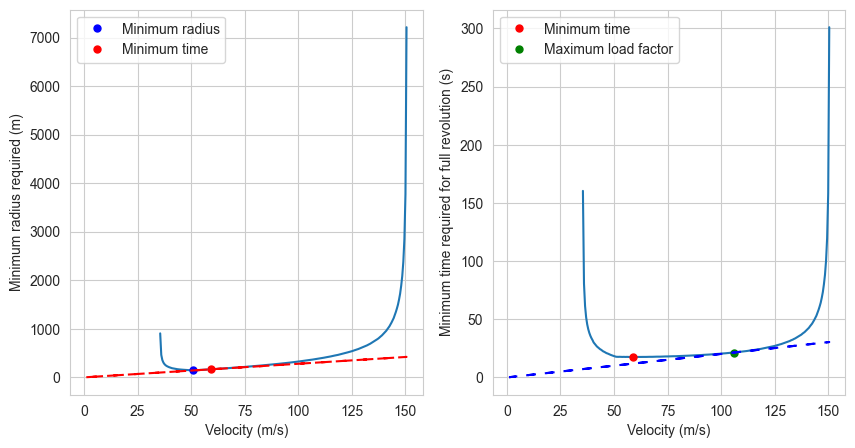

In [5]:
# function_file.comparison_turns()

def comparison_turns():
    sns.set_style('whitegrid')
    # Load factor limits: aerodynamic, propulsive, and structural
    W = 4.27e3  # N
    S = 3.51  # m^2
    A = 7.65
    e = 0.67
    CD0 = 0.02
    k = 1 / (np.pi * A * e)

    # Assuming
    CLmax = 1.6
    Tmax = 1e3  # N

    # Sweeps
    n = np.arange(1, 8.01, 0.01)
    V = np.arange(0, 250.5, 0.5)

    # Dependent variables
    Vs = np.full_like(n, np.nan)
    D = np.full((len(n), len(V)), np.nan)
    nmax = np.full_like(V, np.nan)

    for i in range(len(n)):
        for j in range(len(V)):
            Vs[i] = np.sqrt((2 / 1.225) * (n[i] * W / S) * (1 / CLmax))
            
            if V[j] >= Vs[i]:
                CL = (2 / 1.225) * (n[i] * W / S) * (1 / V[j]**2)
                D[i, j] = 0.5 * 1.225 * V[j]**2 * S * (CD0 + k * CL**2)

                if not np.isnan(D[i, j]) and D[i, j] <= Tmax:
                    nmax[j] = n[i]

    # np.nan values = 0
    V = np.where(np.isnan(nmax), 1, V)
    nmax = np.where(np.isnan(nmax), 1, nmax)
    # V = V[~np.isnan(nmax)]
    # nmax = nmax[~np.isnan(nmax)]
    r_min = V[:]**2 / (9.81 * np.sqrt(nmax[:]**2 - 1))
    t_min = r_min * 2 * np.pi / V[:]

    # notable values 
    V_rmin = V[np.argmin(r_min)]
    V_tmin = V[np.argmin(t_min)]
    V_nmax = V[np.argmax(nmax)]
    R_tmin = V_tmin**2 / (9.81 * np.sqrt(nmax[np.argmin(t_min)]**2 - 1))
    R_nmax = V_nmax**2 / (9.81 * np.sqrt(nmax[np.argmax(nmax)]**2 - 1))
    t_nmax = R_nmax * 2 * np.pi / V_nmax

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(V[:-50], r_min[:-50])
    plt.plot(V_rmin, np.min(r_min), 'bo', markersize=5, markerfacecolor='b', label='Minimum radius')
    plt.plot(V_tmin, r_min[np.argmin(t_min)], 'ro', markersize=5, markerfacecolor='r', label='Minimum time')
    plt.plot(V[:-50], R_tmin/V_tmin * V[:-50], 'r', linestyle='--', dashes=(5, 5))
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Minimum radius required (m)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(V[:-50], t_min[:-50])
    plt.plot(V_tmin, np.min(t_min), 'ro', markersize=5, markerfacecolor='r', label='Minimum time')
    plt.plot(V_nmax, t_min[np.argmax(nmax)], 'go', markersize=5, markerfacecolor='g', label='Maximum load factor')
    plt.plot(V[:-50], t_nmax/V_nmax * V[:-50], 'b', linestyle='--', dashes=(4, 5))
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Minimum time required for full revolution (s)')
    plt.legend()

    plt.show()

comparison_turns()

## Structural limits 

For the three optimisation problems considered in this lecture, the maximum sustainable load factor is pivotal. So far in the analysis of maximum sustainable load factor, only aero-propulsive performance has been considered. However, it may not be safe to fly at those load factors due to lack of structural integrity or human limits. Hence, we are interested in determining the maximum load factor that can be tolerated by the aircraft whilst ensuring sufficient structural integrity. To find these limits, one must consider the maneuver envelope. This has been discussed in more detail in previous courses but is reiterated here. 

A generic maneuver envelope is shown below:

![text](Images\lec3-structural-limits.png)

Certification authorities impose the limit load factors. Based on the category the aircraft falls under, aircrafts must be designed to comply with (or expand upon) these limits. Of course, the different categories have different limits, for instance commercial aircrafts have different specified limits than aerobatic aircrafts. Furthermore, the maneuver point is the only flight condition where the aircraft is flying at the maximum lift coefficient and at the limit load factor. This is highlighted in blue on the diagram. Moreover, if the maximum load factor is limited by structural integrity, the maximum achievable load factor is $n_{lim}$. As a result, the steepest, tightest and fastest turns change accordingly. 


<a id="att"></a>
## Altitude Effects 
Lastly, let us consider the effect of altitude. Throughout our analysis, we have made use of the performance diagram, which is intrinsically dependent on altitude. Hence, it follows intuitively that turning performance is dependent on altitude. Recall, that as altitude increases, the maximum thrust available decrease and the drag curve is shifted towards the right. Hence, a modified $n_{max}-V$ diagram is obtained, from where the same analysis considered earlier can be repeated. The effects of which become: 
- maximum achievable load factor decreases 
- minimum turn radius increases 
- minimum time to turn increases

In [6]:
from ipywidgets import *  # interactive display
# from function_file import *

# interact(function_file.turning_flight_alt, rho=rho_slider)

# interact(function_file.tightest_turns_alt, rho=rho_slider)

# interact(function_file.fastest_turns_alt, rho=rho_slider)

# rho_slider = FloatSlider(min=0.3639, max=1.225, step=0.1, value=1.0, description='air density')
# rho_slider.style = {'description_width': 'initial'}
# display(rho_slider)

altitude = widgets.FloatSlider(min=0, max=10000, step=100, value=0, description='Altitude (m)')
altitude.style = {'description_width': 'initial'}
display(altitude)

# aircraft_name = widgets.Text(description="Enter aircraft name: ")
aircraft_name = widgets.Dropdown(options=['Fokker 100', 'Gulfstream G650', 'Boeing 737-800', 'A330-300', 'MD-11', 'Boeing 777-200'], description="Enter aircraft name: ")
aircraft_name.style = {'description_width': 'initial'}
display(aircraft_name)

button = widgets.Button(description="Plot")

def turning_flight_alt(name, altitude):
    sns.set_style('whitegrid')
    temp = 288.15 - 0.0065 * altitude
    rho = 1.225 * (temp / 288.15)**(1 + 9.81 / (287.05 * 0.0065))
    S, W, A, Tmax = get_aircraft_data(name)
    W = W * 9.81
    e = 0.67
    CD0 = 0.02
    k = 1 / (np.pi * A * e)
    # Assuming
    CLmax = 1.6

    # Sweeps
    n = np.arange(1, 7.01, 0.005)
    V = np.arange(0, 550.5, 0.5)

    # Dependent variables
    Vs = np.full_like(n, np.nan)
    D = np.full((len(n), len(V)), np.nan)
    nmax = np.full_like(V, np.nan)

    for i in range(len(n)):
        for j in range(len(V)):
            Vs[i] = np.sqrt((2 / rho) * (n[i] * W / S) * (1 / CLmax))
            
            if V[j] >= Vs[i]:
                CL = (2 / rho) * (n[i] * W / S) * (1 / V[j]**2)
                D[i, j] = 0.5 * rho * V[j]**2 * S * (CD0 + k * CL**2)

                if not np.isnan(D[i, j]) and D[i, j] <= Tmax:
                    nmax[j] = n[i]

    # Notable values
    V_star = np.sqrt((2 / rho) * (Tmax / S) * (1 / (CD0 + k * CLmax**2)))
    n_star = (Tmax / W) * (CLmax / (CD0 + k * CLmax**2))

    largest_zero_indices = np.zeros(D.shape[0], dtype=int)

    for i in range(D.shape[0]):
        zero_indices = np.where(D[i, :] == 0)[0]
        if zero_indices.size > 0:
            largest_zero_indices[i] = zero_indices.max()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    for i in range(0, len(V), 100):
        plt.plot(V[largest_zero_indices[i]+1:], D[i, largest_zero_indices[i]+1:], label='n = {:.3}'.format(n[i]))
    plt.plot(Vs, 0.5 * rho * Vs**2 * S * (CD0 + k * CLmax**2), 'k--')
    plt.plot(V, np.ones_like(V) * Tmax, 'r-.')
    plt.ylabel('D (N)')
    plt.xlabel('V (m/s)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(V, nmax, linewidth=2, label='At chosen air density')
    plt.plot(V[V <= 1.2 * V_star], 0.5 * rho * V[V <= 1.2 * V_star]**2 * S * CLmax / W, 'r--')
    plt.plot(V_star, n_star, 'bo', markersize=5, markerfacecolor='b')
    plt.legend()
    plt.xlabel('V (m/s)')
    plt.ylabel('Maximum load factor')
    plt.xlim(0, 370)
    plt.show()

output = interactive_output(turning_flight_alt, {'name': aircraft_name, 'altitude': altitude})

# display(button)

def on_button_click(b):
    output = interactive_output(turning_flight_alt, {'name': aircraft_name, 'altitude': altitude})
    output.clear_output()
    with output:
        turning_flight_alt(aircraft_name.value, altitude.value)

button.on_click(on_button_click)

display(output)

FloatSlider(value=0.0, description='Altitude (m)', max=10000.0, step=100.0, style=SliderStyle(description_widt…

Dropdown(description='Enter aircraft name: ', options=('Fokker 100', 'Gulfstream G650', 'Boeing 737-800', 'A33…

Output()

In [9]:
# rho_slider = FloatSlider(min=0.3639, max=1.225, step=0.1, value=1.0, description='air density')
# rho_slider.style = {'description_width': 'initial'}
# display(rho_slider)

altitude = widgets.FloatSlider(min=0, max=10000, step=100, value=0, description='Altitude (m)')
altitude.style = {'description_width': 'initial'}
display(altitude)


# aircraft_name = widgets.Text(description="Enter aircraft name: ")
aircraft_name = widgets.Dropdown(options=['Fokker 100', 'Gulfstream G650', 'Boeing 737-800', 'A330-300', 'MD-11', 'Boeing 777-200'], description="Enter aircraft name: ")
aircraft_name.style = {'description_width': 'initial'}
display(aircraft_name)

button = widgets.Button(description="Plot")

def tightest_turns_alt(name, altitude):
    sns.set_style('whitegrid')
    # Load factor limits: aerodynamic, propulsive, and structural
    temp = 288.15 - 0.0065 * altitude
    rho = 1.225 * (temp / 288.15)**(1 + 9.81 / (287.05 * 0.0065))

    S, W, A, Tmax = get_aircraft_data(name)
    W = W * 9.81
    e = 0.67
    CD0 = 0.02
    k = 1 / (np.pi * A * e)

    # Assuming
    CLmax = 1.6
    # Tmax = 1e3  # N

    # Sweeps
    n = np.arange(1, 8.01, 0.005)
    V = np.arange(0, 450.5, 0.5)

    # Dependent variables
    Vs = np.full_like(n, np.nan)
    D = np.full((len(n), len(V)), np.nan)
    nmax = np.full_like(V, np.nan)

    for i in range(len(n)):
        for j in range(len(V)):
            Vs[i] = np.sqrt((2 / rho) * (n[i] * W / S) * (1 / CLmax))
            
            if V[j] >= Vs[i]:
                CL = (2 / rho) * (n[i] * W / S) * (1 / V[j]**2)
                D[i, j] = 0.5 * rho * V[j]**2 * S * (CD0 + k * CL**2)

                if not np.isnan(D[i, j]) and D[i, j] <= Tmax:
                    nmax[j] = n[i]

    # remove np.nan values
    V = V[~np.isnan(nmax)]
    nmax = nmax[~np.isnan(nmax)]
    r_min = V[:-10]**2 / (9.81 * np.sqrt(nmax[:-10]**2 - 1))

    # seal level stuff just for clarity
    nl = np.arange(1, 8.01, 0.005)
    Vl = np.arange(0, 450.5, 0.5)

    # Dependent variables
    Vsl = np.full_like(nl, np.nan)
    Dl = np.full((len(nl), len(Vl)), np.nan)
    nmaxl = np.full_like(Vl, np.nan)

    for i in range(len(nl)):
        for j in range(len(Vl)):
            Vsl[i] = np.sqrt((2 / 1.225) * (nl[i] * W / S) * (1 / CLmax))
            
            if Vl[j] >= Vsl[i]:
                CL = (2 / 1.225) * (n[i] * W / S) * (1 / Vl[j]**2)
                Dl[i, j] = 0.5 * 1.225 * Vl[j]**2 * S * (CD0 + k * CL**2)

                if not np.isnan(Dl[i, j]) and Dl[i, j] <= Tmax:
                    nmaxl[j] = nl[i]

    # remove np.nan values
    Vl = Vl[~np.isnan(nmaxl)]
    nmaxl = nmaxl[~np.isnan(nmaxl)]
    r_minl = Vl[:-10]**2 / (9.81 * np.sqrt(nmaxl[:-10]**2 - 1))

    plt.plot(V[:-10], r_min, label='Chosen air density', color='b')
    plt.plot(Vl[:-10], r_minl, label='Sea level', color='g')
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Minimum radius required (m)')
    plt.legend()
    plt.show()

output = interactive_output(tightest_turns_alt, {'name': aircraft_name, 'altitude': altitude})

# display(button)

def on_button_click(b):
    output = interactive_output(tightest_turns_alt, {'name': aircraft_name, 'altitude': altitude})
    output.clear_output()
    with output:
        tightest_turns_alt(aircraft_name.value, altitude.value)

button.on_click(on_button_click)

display(output)

FloatSlider(value=0.0, description='Altitude (m)', max=10000.0, step=100.0, style=SliderStyle(description_widt…

Dropdown(description='Enter aircraft name: ', options=('Fokker 100', 'Gulfstream G650', 'Boeing 737-800', 'A33…

Output()

In [1]:
# rho_slider = FloatSlider(min=0.3639, max=1.225, step=0.1, value=1.0, description='air density')
# rho_slider.style = {'description_width': 'initial'}
# display(rho_slider)

altitude = widgets.FloatSlider(min=0, max=10000, step=100, value=0, description='Altitude (m)')
altitude.style = {'description_width': 'initial'}
display(altitude)

# aircraft_name = widgets.Text(description="Enter aircraft name: ")
aircraft_name = widgets.Dropdown(options=['Fokker 100', 'Gulfstream G650', 'Boeing 737-800', 'A330-300', 'MD-11', 'Boeing 777-200'], description="Enter aircraft name: ")
aircraft_name.style = {'description_width': 'initial'}
display(aircraft_name)

button = widgets.Button(description="Plot")

def fastest_turns_alt(name, altitude):
    sns.set_style('whitegrid')
    # Load factor limits: aerodynamic, propulsive, and structural
    temp = 288.15 - 0.0065 * altitude
    rho = 1.225 * (temp / 288.15)**(1 + 9.81 / (287.05 * 0.0065))
    S, W, A, Tmax = get_aircraft_data(name)
    W = W * 9.81
    e = 0.67
    CD0 = 0.02
    k = 1 / (np.pi * A * e)

    # Assuming
    CLmax = 1.6
    # Tmax = 1e3  # N

    # Sweeps
    n = np.arange(1, 8.01, 0.005)
    V = np.arange(0, 450.5, 0.5)

    # Dependent variables
    Vs = np.full_like(n, np.nan)
    D = np.full((len(n), len(V)), np.nan)
    nmax = np.full_like(V, np.nan)

    for i in range(len(n)):
        for j in range(len(V)):
            Vs[i] = np.sqrt((2 / rho) * (n[i] * W / S) * (1 / CLmax))
            
            if V[j] >= Vs[i]:
                CL = (2 / rho) * (n[i] * W / S) * (1 / V[j]**2)
                D[i, j] = 0.5 * rho * V[j]**2 * S * (CD0 + k * CL**2)

                if not np.isnan(D[i, j]) and D[i, j] <= Tmax:
                    nmax[j] = n[i]

    # remove np.nan values
    V = V[~np.isnan(nmax)]
    nmax = nmax[~np.isnan(nmax)]
    r_min = V[:-10]**2 / (9.81 * np.sqrt(nmax[:-10]**2 - 1))
    t_min = r_min * 2 * np.pi / V[:-10]

    # seal level stuff just for clarity
    nl = np.arange(1, 8.01, 0.005)
    Vl = np.arange(0, 450.5, 0.5)

    # Dependent variables
    Vsl = np.full_like(nl, np.nan)
    Dl = np.full((len(nl), len(Vl)), np.nan)
    nmaxl = np.full_like(Vl, np.nan)

    for i in range(len(nl)):
        for j in range(len(Vl)):
            Vsl[i] = np.sqrt((2 / 1.225) * (nl[i] * W / S) * (1 / CLmax))
            
            if Vl[j] >= Vsl[i]:
                CL = (2 / 1.225) * (n[i] * W / S) * (1 / Vl[j]**2)
                Dl[i, j] = 0.5 * 1.225 * Vl[j]**2 * S * (CD0 + k * CL**2)

                if not np.isnan(Dl[i, j]) and Dl[i, j] <= Tmax:
                    nmaxl[j] = nl[i]

    # remove np.nan values
    Vl = Vl[~np.isnan(nmaxl)]
    nmaxl = nmaxl[~np.isnan(nmaxl)]
    r_minl = Vl[:-10]**2 / (9.81 * np.sqrt(nmaxl[:-10]**2 - 1))
    t_minl = r_minl * 2 * np.pi / Vl[:-10]

    plt.plot(V[:-10], t_min, label='Chosen air density', color='b')
    plt.plot(Vl[:-10], t_minl, label='Sea level', color='g')
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Minimum time required for full revolution (s)')
    plt.legend()
    plt.show()

output = interactive_output(fastest_turns_alt, {'name': aircraft_name, 'altitude': altitude})

# display(button)

def on_button_click(b):
    output = interactive_output(fastest_turns_alt, {'name': aircraft_name, 'altitude': altitude})
    output.clear_output()
    with output:
        fastest_turns_alt(aircraft_name.value, altitude.value)

button.on_click(on_button_click)

display(output)

NameError: name 'widgets' is not defined

<span style='color:green'>Extra challenge!
Is it possible for an Airbus A321 in realistic operating conditions
to fly a turn with $\mu = 15$ degrees at an altitude of 11000m and speed of 0.8 Mach?

## Conclusion

That marks the end of the third notebook! 

Once you feel as though you have understood the bulk of the contents check if you can do the following: 

- Dervive the equations of motion for an aircraft performing a steady turn
- Understand the notion of standard turns and importance in reality
- Compute the radius of a turn and time required to complete a full revolution, given the necessary information 
- Explain and understand how to contruct plots to determine the steepest, tightest and fastest turns
- Explain and understand the effects of altitude on turning performance 
- Qualitatively explain and understand how structural limits are imposed and their implications on turning flight

Please use these objectives as a foundation, you are strongely encouraged to go beyond and consider further implications of the theory described.

If these objectives feel doable, please test your understanding using the practice exercises given below. 

<a id="next"></a>
## What next? 

- Make sure to practice and sharpen your skills using the exercises below! 
- Start reading the next (or previous) notebook(s) by clicking on the notebook of your choice below!

<!DOCTYPE html>
<html>
<body>

<!-- Image 1 -->
<a href="Lecture 1.ipynb">
    <img src="Images\lec1.png" style="display:inline-block; width: 220px;">
</a>

<!-- Image 2 -->
<a href="Lecture 2.ipynb">
    <img src="Images\lec2.png" style="display:inline-block; width: 220px;">
</a>

<!-- Image 3 -->
<a href="Lecture 3.ipynb">
    <img src="Images\lec3.png" style="display:inline-block; width: 220px;">
</a>

<!-- Image 4 -->
<a href="Lecture 4.ipynb">
    <img src="Images\lec4.png" style="display:inline-block; width: 220px;">
</a>

<!-- Image 5 -->
<a href="Lecture 5.ipynb">
    <img src="Images\lec5.png" style="display:inline-block; width: 220px;">
</a>

<!-- Image 6 -->
<a href="Lecture 6.ipynb">
    <img src="Images\lec6.png" style="display:inline-block; width: 220px;">
</a>

<!-- Image 7 -->
<a href="Lecture 7.ipynb">
    <img src="Images\lec7.png" style="display:inline-block; width: 220px;">
</a>

<!-- Add more images and links as needed -->

</body>
</html>

<script>
function toggle() {
    var element = document.getElementById("details");
    if (element.style.display === "none") {
        element.style.display = "block";
    } else {
        element.style.display = "none";
    }
}
</script>

<button onclick="toggle()">Exercises</button>

<div id="details" style="display:none">

1. An airplane is in a steady level symmetric flight condition. The true airspeed equals 100 m/s. The pilot initiates a steady level coordinated turn by banking the aircraft to 30 and has the intention to maintain airspeed and altitude. After banking the aircraft, the pilot must

a.	increase the pitch attitude and thereby the angle of attack
b.	increase the thrust
c.	none of the above
d.	increase the pitch attitude and the thrust

2. 12.	Consider an airplane conducting a turn at a bank angle  of 60 and an airspeed of 80 m/s. Calculate the corresponding load factor

3. 13.	Air traffic control requests an airplane to conduct a level rate one turn at an airspeed of 70.0 m/s and 1000 m altitude (I.S.A.). Determine the bank angle needed to execute the turn and the corresponding turn radius and load factor.

4. 14.	A general aviation airplane has a maximum lift coefficient CLmax of 1.4, a weight W of 8 kN and a wing surface area S of 10 m2. 
a.	Calculate the stall speed of this airplane in (a) steady level symmetric flight and in (b) a steady level coordinated turn at a load factor n = 2. 
b.	Discuss the effect of bank angle on stall speed

5. 16.	For the airplane of problem 5, consider flight steady level coordinated turning flight conditions at different angles of bank ($\degree = 30\degree, 45\degree and 60\degree$) but at a fixed angle of attack of 5$\degree$.  The airplane has a linear lift curve slope up to the maximum lift coefficient, i.e., 
$$ C_L = 5.15(\alpha + 0.009) $$ 
 
Note that the angle of attack is defined in radians in the equation for lift coefficient. Calculate the aerodynamic drag D, power required Pr and corresponding true airspeed V, for each angle of bank specified. 

</div>
